<a href="https://colab.research.google.com/github/Navi433/Dog_cat-classification/blob/master/DOG_or_CAT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

1.15.0


In [8]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/dog-cat-full-dataset/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/dog-cat-full-dataset/data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 20000,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 2000)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
20000/20000 [==============================] - 4892s 245ms/step - loss: 0.2975 - acc: 0.8666 - val_loss: 0.5574 - val_acc: 0.8210


In [7]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [0]:
from keras.preprocessing import image
import numpy as np

In [0]:
testimage_Dog=image.load_img('/content/drive/My Drive/dog.2.jpg',target_size=(64,64))


Dog


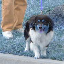

In [79]:
testimage_Dog=image.img_to_array(testimage_Dog)
testimage_Dog=np.expand_dims(testimage_Dog,axis=0)
result=classifier.predict(testimage_Dog)
if result[0][0]==1:
  prediction='Dog'
  print(prediction)
else:
  prediction='cat'
  print(prediction)
test_image=testimage.reshape(64,64,3)
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(test_image)


In [0]:
testimage_cat=image.load_img('/content/drive/My Drive/cat.4045.jpg',target_size=(64,64))

cat


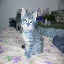

In [73]:
testimage_cat=image.img_to_array(testimage_cat)
testimage_cat=np.expand_dims(testimage_cat,axis=0)
result=classifier.predict(testimage_cat)
if result[0][0]==1:
  prediction='Dog'
  print(prediction)
else:
  prediction='cat'
  print(prediction)
test_image=testimage_cat.reshape(64,64,3)
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(test_image)